In [ ]:
!pip install pandas scikit-learn matplotlib seaborn


In [ ]:

from google.colab import files
uploaded = files.upload()
import os

kaggle_file_name = list(uploaded.keys())[0]

os.makedirs('/root/.kaggle', exist_ok=True)


!mv "{kaggle_file_name}"
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle (3).json
mv: missing destination file operand after 'kaggle (3).json'
Try 'mv --help' for more information.
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d muhammedtausif/best-selling-mobile-phones

Dataset URL: https://www.kaggle.com/datasets/muhammedtausif/best-selling-mobile-phones
License(s): CC0-1.0
best-selling-mobile-phones.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
current_files = os.listdir()
print("Current files in directory:")
print(current_files)

Current files in directory:
['.config', 'kaggle (1).json', 'kaggle (2).json', 'total-phone-devices-by-company-2021.csv', 'mobile-phone-brands-by-country.csv', 'best-selling-mobile-phones.csv', 'kaggle.json', 'best-selling-mobile-phones.zip', 'kaggle (3).json', 'Best Selling Mobile Phones 2020.csv', 'sample_data']


In [ ]:
!unzip best-selling-mobile-phones.zip

Archive:  best-selling-mobile-phones.zip
replace Best Selling Mobile Phones 2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

df = pd.read_csv('best-selling-mobile-phones.csv')

# Display the first few rows to understand the structure
print(df.head())


  manufacturer                         model         form smartphone  year  \
0        Nokia                          1100          Bar         No  2003   
1        Nokia                          1110          Bar         No  2005   
2        Apple    iPhone 6 and iPhone 6 Plus  Touchscreen        Yes  2014   
3        Nokia        105 (2013), 105 (2015)          Bar         No  2013   
4        Apple  iPhone 6S and iPhone 6S Plus  Touchscreen        Yes  2015   

   units_sold_m  
0         250.0  
1         247.5  
2         224.0  
3         200.0  
4         174.1  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# One-hot encode the manufacturer column
encoder = OneHotEncoder()
X = encoder.fit_transform(df[['manufacturer']]).toarray()

# Define the target (y)
y = df['units_sold_m'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2980.668188374857
R^2 Score: 0.3634041315709231


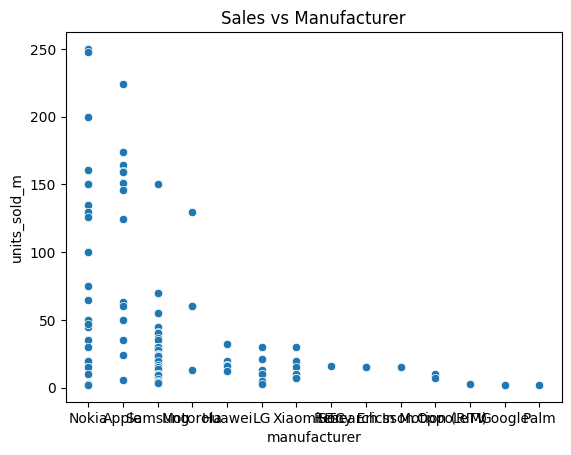

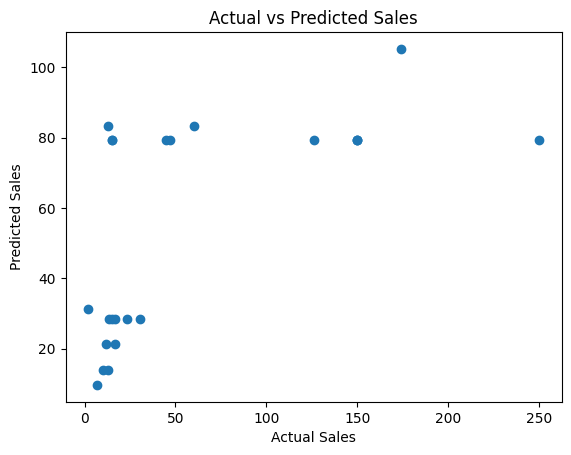

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualize relationships
sns.scatterplot(x='manufacturer', y='units_sold_m', data=df)
plt.title('Sales vs Manufacturer')
plt.show()

#Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


In [ ]:
!pip install pennylane pennylane-qiskit


In [ ]:
import os
import pandas as pd
import numpy as np
import pennylane as qml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the dataset
df = pd.read_csv('best-selling-mobile-phones.csv')

# Display the first few rows to understand the structure
print(df.head())


  manufacturer                         model         form smartphone  year  \
0        Nokia                          1100          Bar         No  2003   
1        Nokia                          1110          Bar         No  2005   
2        Apple    iPhone 6 and iPhone 6 Plus  Touchscreen        Yes  2014   
3        Nokia        105 (2013), 105 (2015)          Bar         No  2013   
4        Apple  iPhone 6S and iPhone 6S Plus  Touchscreen        Yes  2015   

   units_sold_m  
0         250.0  
1         247.5  
2         224.0  
3         200.0  
4         174.1  


In [ ]:
# One-hot encode the manufacturer column
encoder = OneHotEncoder()
X = encoder.fit_transform(df[['manufacturer']]).toarray() #Here I had to create an iterable array for the manufacturer so that we can map integers against each other

# Define the target (y)
y = df['units_sold_m'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Ensuring it's not going to overflow
num_qubits = X_train.shape[1]
dev = qml.device("default.qubit", wires=num_qubits)

In [ ]:
# Define a variational quantum circuit
def variational_circuit(weights, x):
    qml.templates.AngleEmbedding(x, wires=range(num_qubits))
    qml.templates.BasicEntanglerLayers(weights, wires=range(num_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

#Here I did the QNode
@qml.qnode(dev, interface='tf')
def quantum_neural_network(inputs, weights):
    return variational_circuit(weights, inputs)

# Starting the QNN model
num_layers = 3
weight_shapes = {"weights": (num_layers, num_qubits)}
qlayer = qml.qnn.KerasLayer(quantum_neural_network, weight_shapes, output_dim=num_qubits)

# Classical part of the model
model = Sequential()
model.add(qlayer)
model.add(Flatten())
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mse')



Epoch 1/20
5/5 [==============================] - 1s 61ms/step - loss: 0.2032 - val_loss: 0.1697
Epoch 2/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1402 - val_loss: 0.1365
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 0.1075 - val_loss: 0.1281
Epoch 4/20
5/5 [==============================] - 0s 20ms/step - loss: 0.1007 - val_loss: 0.1336
Epoch 5/20
5/5 [==============================] - 0s 17ms/step - loss: 0.1010 - val_loss: 0.1378
Epoch 6/20
5/5 [==============================] - 0s 17ms/step - loss: 0.1002 - val_loss: 0.1357
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0977 - val_loss: 0.1304
Epoch 8/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0943 - val_loss: 0.1278
Epoch 9/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0935 - val_loss: 0.1258
Epoch 10/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0922 - val_loss: 0.1256
Epoch 11/20
5/5 [============

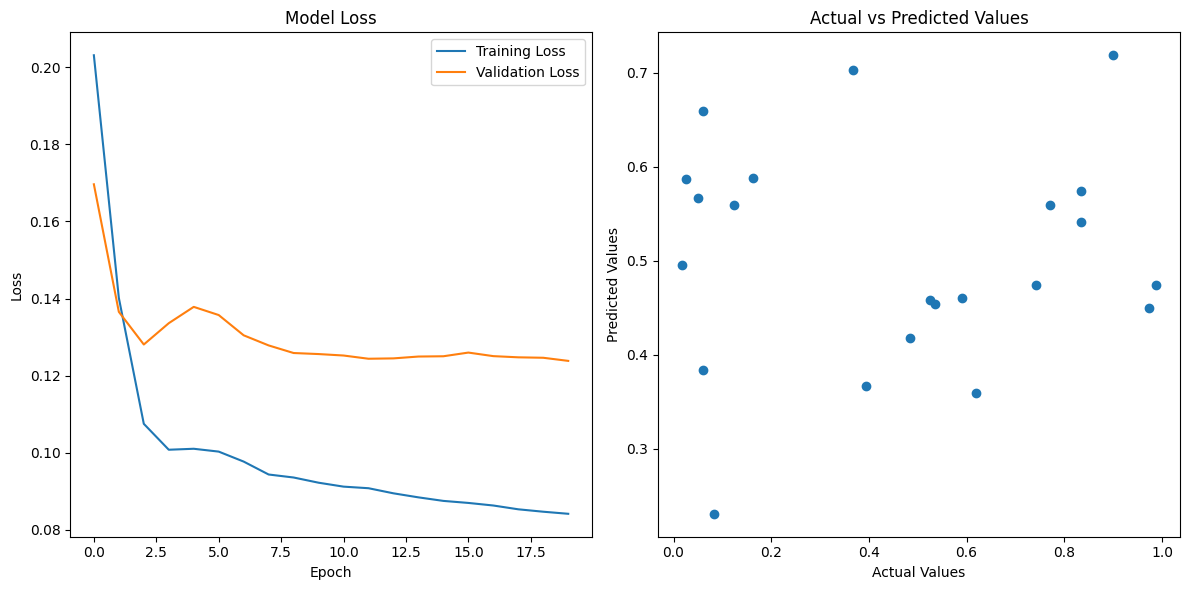

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#  X and y = features and target variables
X = np.random.rand(110, 6)
y = np.random.rand(110)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your TensorFlow model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=20, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot training history
plt.figure(figsize=(12, 6))

# Plot loss during training
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot actual vs predicted sales
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.tight_layout()
plt.show()
